In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Capstone Project/

/content/drive/MyDrive/Capstone Project


In [3]:
#Import Required Packages for EDA 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [6]:
#Read the dataset/s
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/diabetes.csv')

In [9]:
#1. Checking description(first 5 and last 5 rows)
df.head() 

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
df.tail()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [10]:
df.shape

(520, 17)

In [11]:
# name of the attributes
df.columns
 

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'diabetes'],
      dtype='object')

In [ ]:
#unique values for each attribute
df.nunique()


age                   51
gender                 2
polyuria               2
polydipsia             2
sudden_weight_loss     2
weakness               2
polyphagia             2
genital_thrush         2
visual_blurring        2
itching                2
irritability           2
delayed_healing        2
partial_paresis        2
muscle_stiffness       2
alopecia               2
obesity                2
diabetes               2
dtype: int64

In [ ]:
#Complete info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  diabetes            520 no

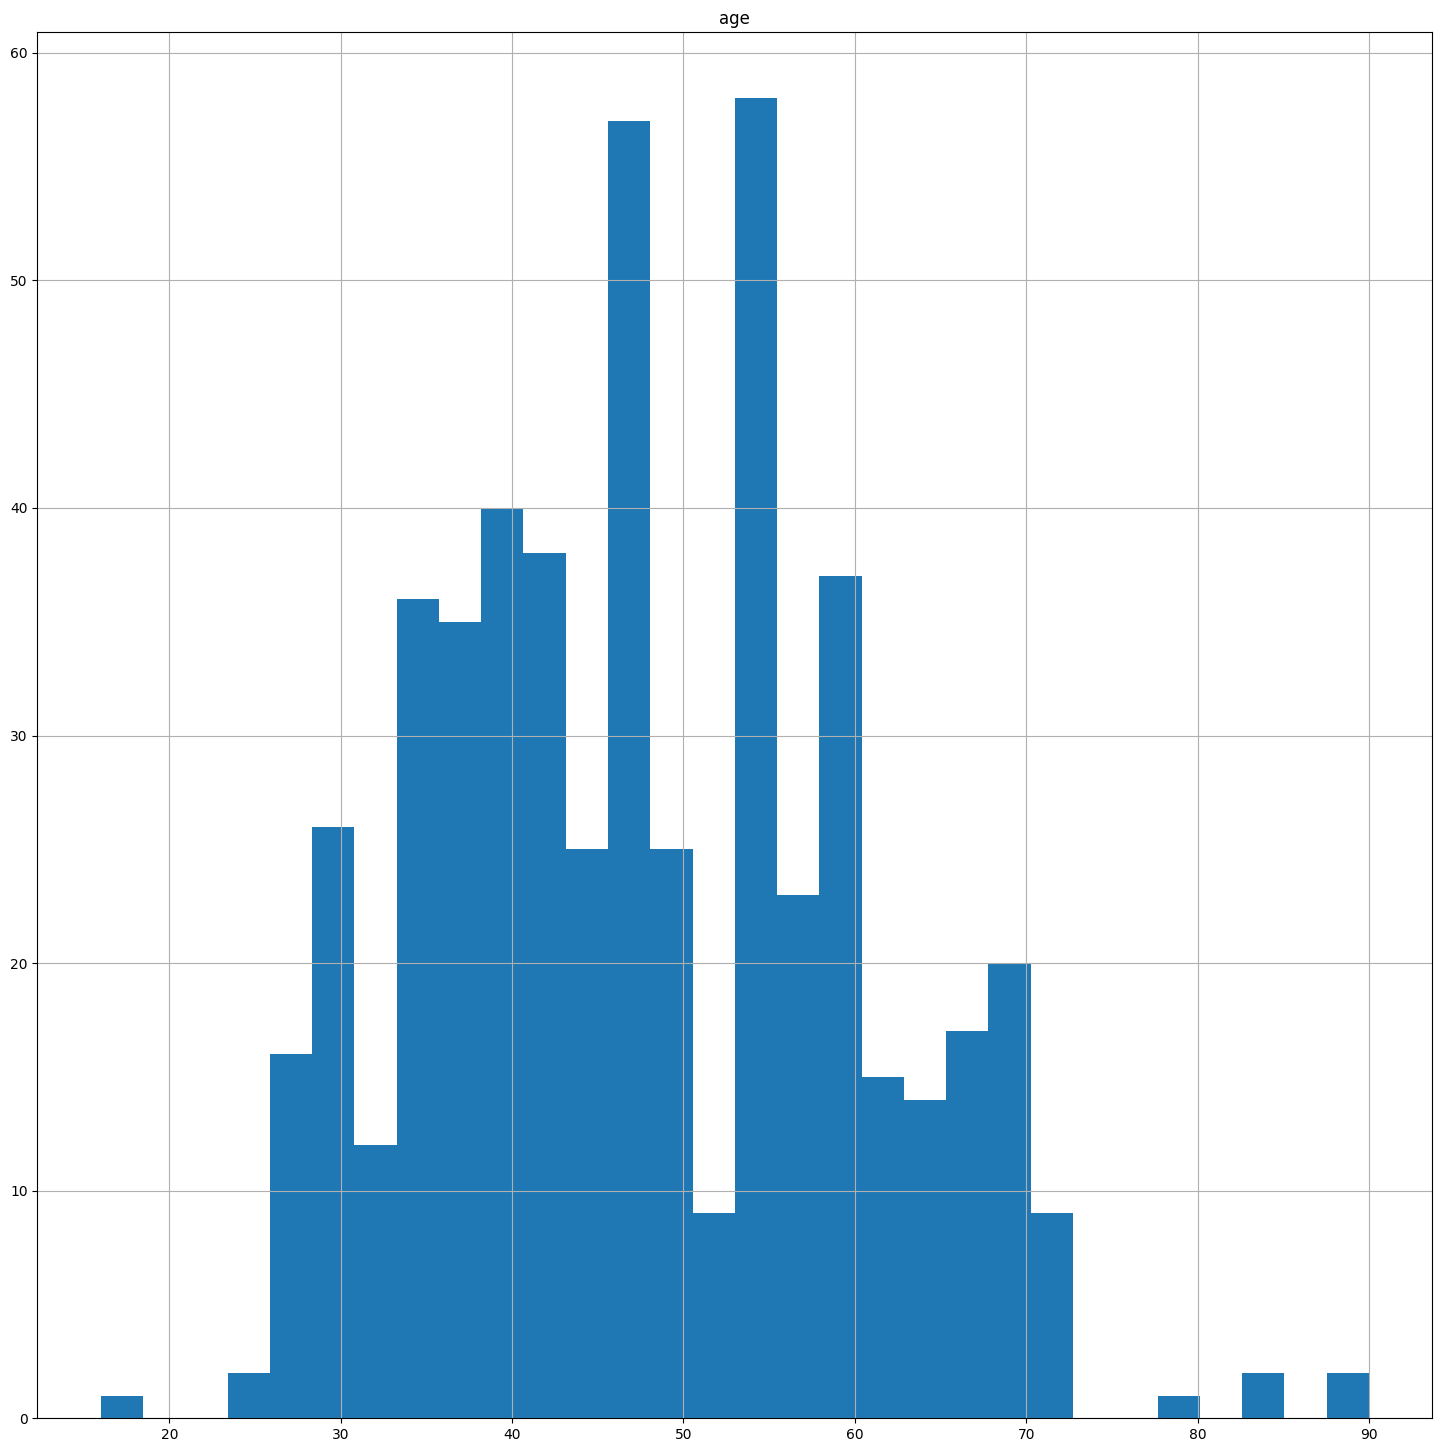

In [ ]:
#3. Visualising data  distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

Positive    320
Negative    200
Name: diabetes, dtype: int64


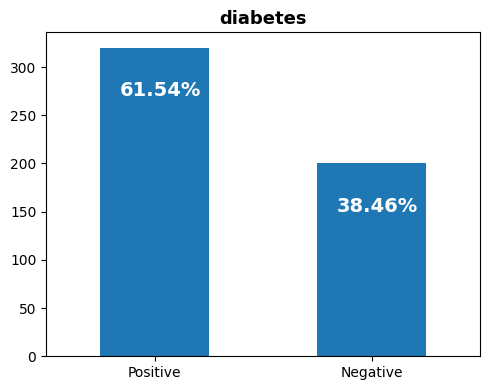

In [13]:

#checking target value distribution
print(df.diabetes.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Positive", "Negative"]
ax = df.diabetes.value_counts().plot(kind='bar')
ax.set_title("diabetes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()


In [14]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 23.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=d92703d95c220785f1173d9a5de6c653c4bfafc260e8ba70518ae33be78e7ad7
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [16]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="DIABETES EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
0,40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
516,48,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
517,58,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
518,32,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
class_label =df['diabetes']
df = df.drop(['diabetes'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['diabetes']=class_label
df


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
516,0.432432,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
517,0.567568,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
518,0.216216,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
#pre-processing
diabetes_data = df.copy()
le = preprocessing.LabelEncoder()
age = le.fit_transform(list(diabetes_data["age"])) 
gender = le.fit_transform(list(diabetes_data["gender"])) 
polyuria = le.fit_transform(list(diabetes_data["polyuria"])) 
polydipsia = le.fit_transform(list(diabetes_data["polydipsia"])) 
sudden_weight_loss = le.fit_transform(list(diabetes_data["sudden_weight_loss"])) 
weakness = le.fit_transform(list(diabetes_data["weakness"])) 
polyphagia = le.fit_transform(list(diabetes_data["polyphagia"])) 
genital_thrush = le.fit_transform(list(diabetes_data["genital_thrush"])) 
visual_blurring = le.fit_transform(list(diabetes_data["visual_blurring"])) 
itching = le.fit_transform(list(diabetes_data["itching"])) 
irritability = le.fit_transform(list(diabetes_data["irritability"])) 
delayed_healing = le.fit_transform(list(diabetes_data["delayed_healing"])) 
partial_paresis = le.fit_transform(list(diabetes_data["partial_paresis"])) 
muscle_stiffness = le.fit_transform(list(diabetes_data["muscle_stiffness"])) 
alopecia = le.fit_transform(list(diabetes_data["alopecia"])) 
obesity = le.fit_transform(list(diabetes_data["obesity"])) 
diabetes = le.fit_transform(list(diabetes_data["diabetes"])) 


In [23]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [24]:
x = list(zip(age, gender, polyuria, polydipsia, sudden_weight_loss, weakness, polyphagia, genital_thrush, visual_blurring, itching, irritability, delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity))
y = list(diabetes)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows

#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((416, 16), (104, 16))

In [35]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.889329 (0.033761)

SVM: 0.615462 (0.033923)

GBM: 0.966294 (0.017742)

RF: 0.978342 (0.009047)



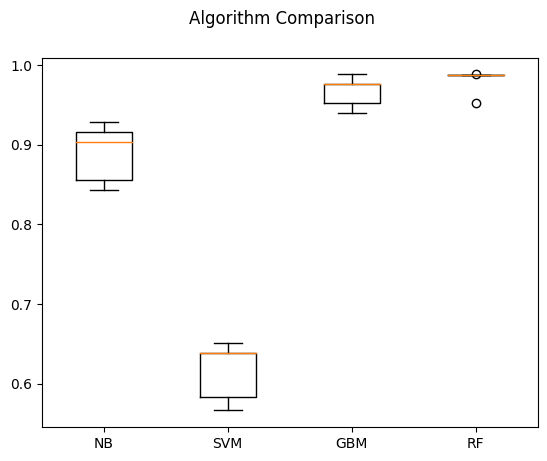

In [34]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [36]:
#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

svm = SVC()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

best_model = rf

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.9711538461538461


In [37]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.98      0.98        62

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



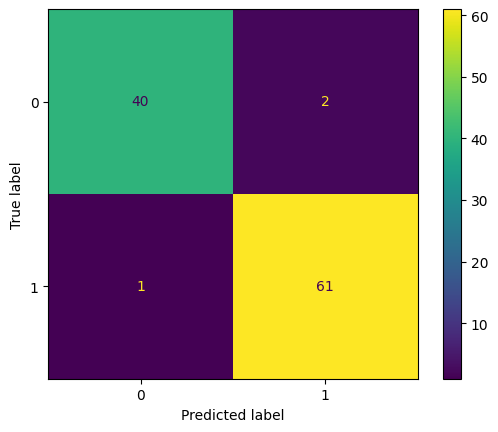

In [38]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


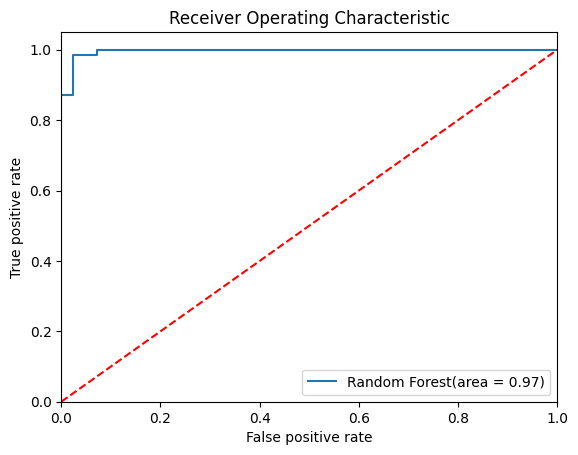

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [41]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)



Predicted:  1 Actual:  1 Data:  (26, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0)
Predicted:  0 Actual:  0 Data:  (40, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0)
Predicted:  1 Actual:  1 Data:  (19, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1)
Predicted:  1 Actual:  1 Data:  (26, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0)
Predicted:  0 Actual:  0 Data:  (37, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0)
Predicted:  1 Actual:  1 Data:  (29, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0)
Predicted:  1 Actual:  1 Data:  (12, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0)
Predicted:  0 Actual:  1 Data:  (21, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0)
Predicted:  1 Actual:  1 Data:  (14, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1)
Predicted:  1 Actual:  1 Data:  (4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0)
Predicted:  0 Actual:  0 Data:  (31, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0)
Predicted:  1 Actual:  1 Data:  (21, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0)
Predicted:  0 Act